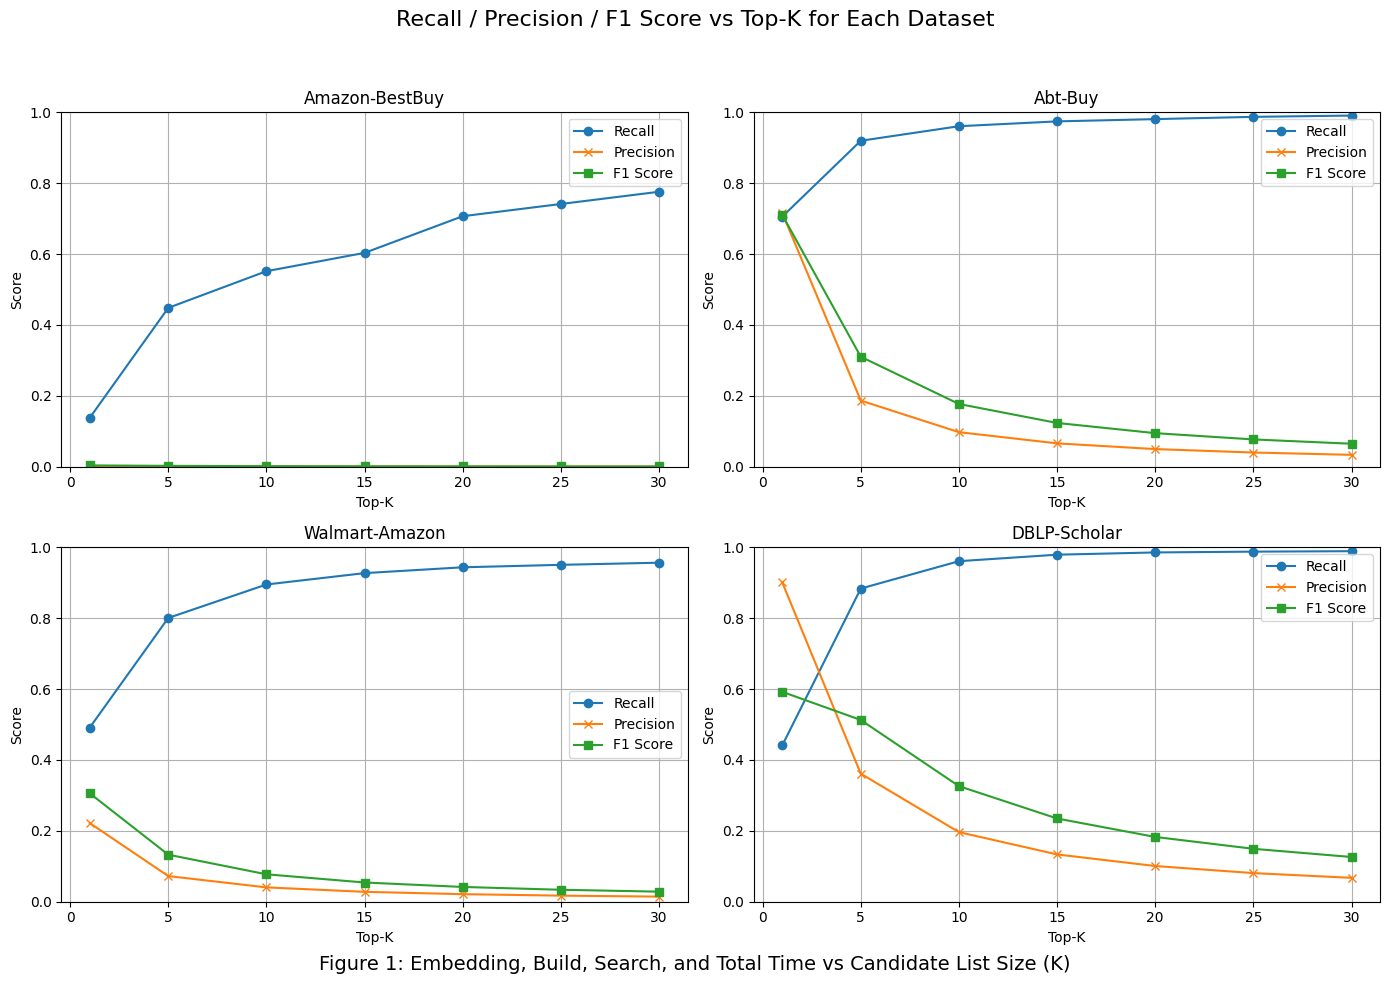

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset file paths and titles
files = {
    "eval/amazon_bestbuy_evaluation_results.csv": "Amazon-BestBuy",
    "eval/blocking_evaluation_results_apt-buy.csv": "Abt-Buy",
    "eval/walmart_amazon_evaluation_results.csv": "Walmart-Amazon",
    "eval/dblp_scholar_evaluation_results_DBLP-Scholar.csv": "DBLP-Scholar"
}

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Recall / Precision / F1 Score vs Top-K for Each Dataset", fontsize=16)

# Plot each dataset in its own subplot
for ax, (file, title) in zip(axs.flatten(), files.items()):
    df = pd.read_csv(file)
    ax.plot(df["k"], df["recall"], marker='o', label="Recall")
    ax.plot(df["k"], df["precision"], marker='x', label="Precision")
    ax.plot(df["k"], df["f1_score"], marker='s', label="F1 Score")
    ax.set_title(title)
    ax.set_xlabel("Top-K")
    ax.set_ylabel("Score")
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.figtext(
    0.5, 0.02,
    "Figure 1: Embedding, Build, Search, and Total Time vs Candidate List Size (K)",
    wrap=True, horizontalalignment='center', fontsize=14
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("blocking_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

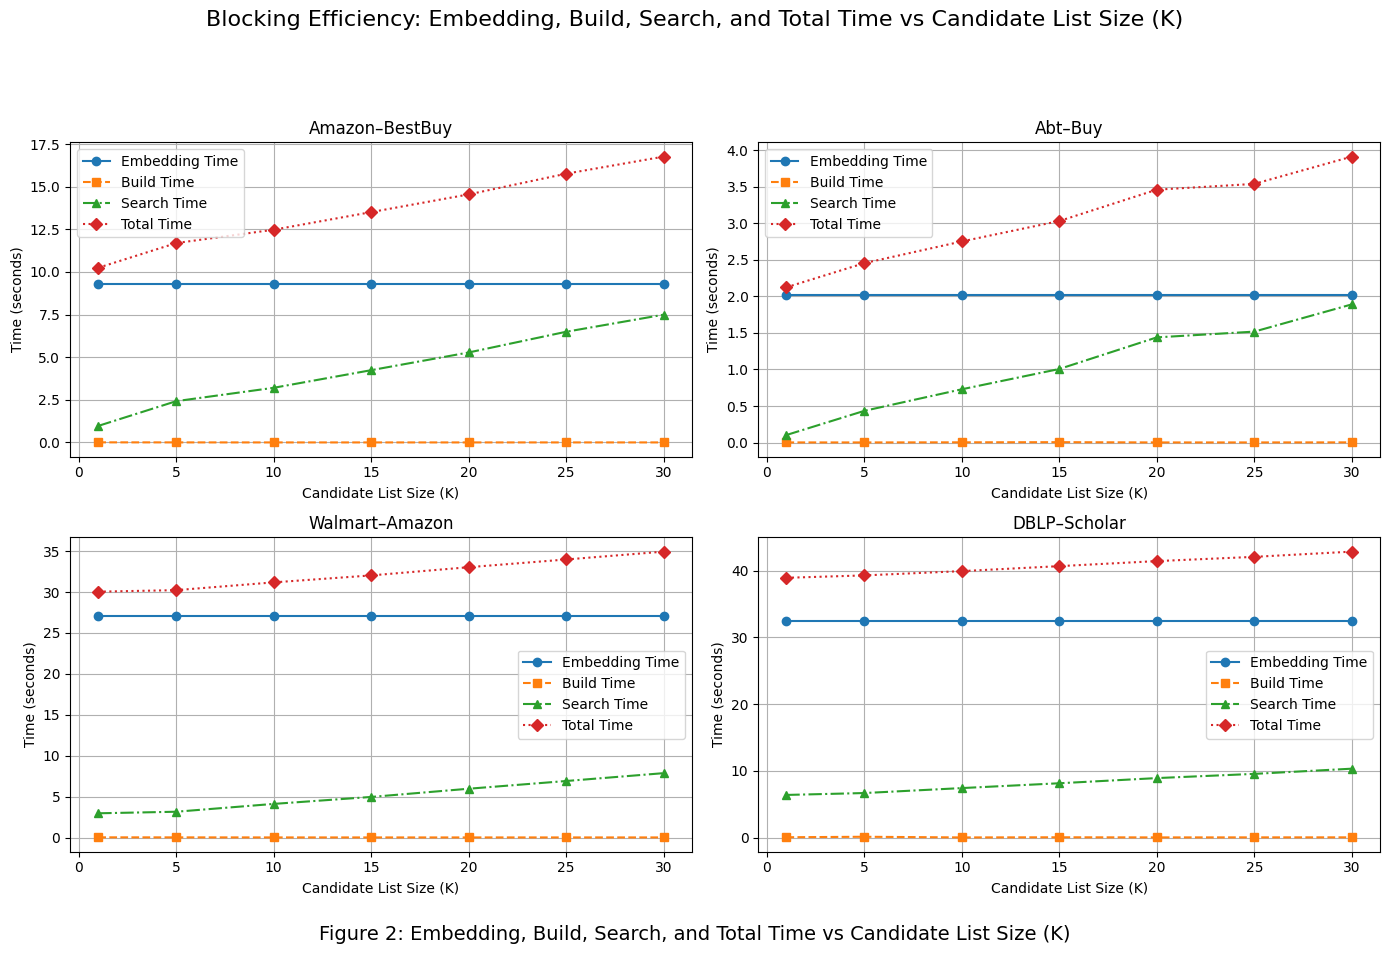

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths and dataset names
files = {
    "eval/amazon_bestbuy_evaluation_results.csv": "Amazon–BestBuy",
    "eval/blocking_evaluation_results_apt-buy.csv": "Abt–Buy",
    "eval/walmart_amazon_evaluation_results.csv": "Walmart–Amazon",
    "eval/dblp_scholar_evaluation_results_DBLP-Scholar.csv": "DBLP–Scholar"
}

# Set up 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Define style for each line (marker, linestyle)
styles = {
    'embedding_time': ('o', '-'),   # Circle, solid
    'build_time':     ('s', '--'),  # Square, dashed
    'search_time':    ('^', '-.'),  # Triangle, dash-dot
    'total_time':     ('D', ':')    # Diamond, dotted
}

for idx, (filename, title) in enumerate(files.items()):
    df = pd.read_csv(filename)
    df['total_time'] = df['embedding_time'] + df['build_time'] + df['search_time']

    ax = axes[idx]
    for col, (marker, linestyle) in styles.items():
        ax.plot(df['k'], df[col], marker=marker, linestyle=linestyle, label=col.replace('_', ' ').title())

    ax.set_title(f"{title}")
    ax.set_xlabel("Candidate List Size (K)")
    ax.set_ylabel("Time (seconds)")
    ax.grid(True)
    ax.legend()

# Add global title and layout
plt.suptitle("Blocking Efficiency: Embedding, Build, Search, and Total Time vs Candidate List Size (K)", fontsize=16)
plt.tight_layout(rect=[0, 0.08, 1, 0.92])  # Leave space for description

# Add figure description like in papers
plt.figtext(
    0.5, 0.05,
    "Figure 2: Embedding, Build, Search, and Total Time vs Candidate List Size (K)",
    wrap=True, horizontalalignment='center', fontsize=14
)

plt.savefig("blocking_efficiency_analysis_with_caption.png", dpi=300, bbox_inches='tight')
plt.show()

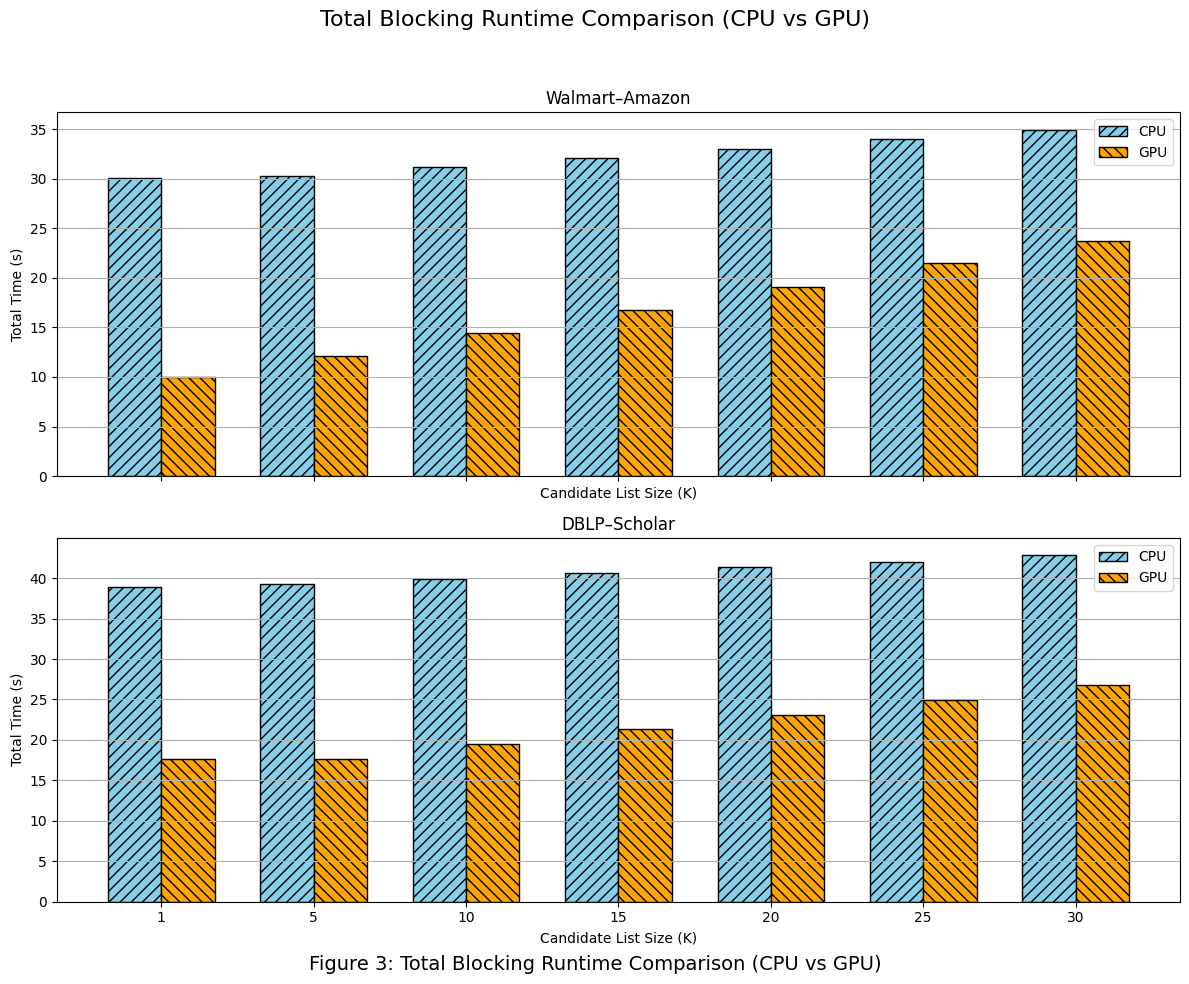

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Define file pairs and titles ===
file_pairs = [
    ("eval/walmart_amazon_evaluation_results.csv", "eval_gpu/walmart_amazon_blocking_evaluation_gpu_results.csv", "Walmart–Amazon"),
    ("eval/dblp_scholar_evaluation_results_DBLP-Scholar.csv", "eval_gpu/dblp_scholar_blocking_evaluation_gpu_results.csv", "DBLP–Scholar")
]

# === Plot setup ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# === Loop through each dataset ===
for idx, (cpu_file, gpu_file, title) in enumerate(file_pairs):
    cpu_df = pd.read_csv(cpu_file)
    gpu_df = pd.read_csv(gpu_file)

    # Compute total time
    cpu_df['total_time'] = cpu_df['embedding_time'] + cpu_df['build_time'] + cpu_df['search_time']
    gpu_df['total_time'] = gpu_df['embedding_time'] + gpu_df['build_time'] + gpu_df['search_time']

    # Align K values
    k_values = cpu_df['k']
    cpu_times = cpu_df['total_time']
    gpu_times = gpu_df['total_time']
    x = np.arange(len(k_values))
    bar_width = 0.35

    # Plot with both color and hatching
    ax = axes[idx]
    cpu_bars = ax.bar(
        x - bar_width / 2, cpu_times, width=bar_width,
        label='CPU', color='skyblue', hatch='///', edgecolor='black'
    )
    gpu_bars = ax.bar(
        x + bar_width / 2, gpu_times, width=bar_width,
        label='GPU', color='orange', hatch='\\\\\\', edgecolor='black'
    )

    ax.set_title(f"{title}")
    ax.set_xlabel("Candidate List Size (K)")
    ax.set_ylabel("Total Time (s)")
    ax.set_xticks(x)
    ax.set_xticklabels(k_values)
    ax.grid(axis='y')
    ax.legend()

# === Finalize and save ===
plt.figtext(
    0.5, 0.02,
    "Figure 3: Total Blocking Runtime Comparison (CPU vs GPU)",
    wrap=True, horizontalalignment='center', fontsize=14
)
plt.suptitle("Total Blocking Runtime Comparison (CPU vs GPU)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cpu_vs_gpu_total_time_2datasets_color_hatched.png", dpi=300, bbox_inches='tight')
plt.show()